# TP OPENFOODFACT

Répartition:
Nous avons beaucoup travaillé ensemble, dans un premier temps, nous avons réalisé une analyse simple chacun de notre côté.
Nous avons rassemblé ensuite nos analyses.

Simon s'est occupé de terminer la partie "main_category".

Bastien s'est occupé de la partie "categories" et de l'analyse non supervisée.

Lien du git: https://github.com/bastrob/TP_OPENFOODFACT_YNOV

In [12]:
import pandas as pd
import importlib
import numpy as np
import fonctions_notebook as fn
import OutliersDetection as o

In [13]:
# Reload module fonctions_notebook (pour éviter de restart le kernel)
importlib.reload(fn)

<module 'fonctions_notebook' from 'C:\\Users\\Bast\\Desktop\\TP_OPENFOODFACT_YNOV\\fonctions_notebook.py'>

In [14]:
importlib.reload(o)

<module 'OutliersDetection' from 'C:\\Users\\Bast\\Desktop\\TP_OPENFOODFACT_YNOV\\OutliersDetection.py'>

In [15]:
df = fn.load_csv("E:/datasets/en.openfoodfacts.org.products.tsv", '\t')

E:\Anaconda\envs\openfoodfact\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
df.head()

code                                                url  \
0   3087  http://world-en.openfoodfacts.org/product/0000...   
1   4530  http://world-en.openfoodfacts.org/product/0000...   
2   4559  http://world-en.openfoodfacts.org/product/0000...   
3  16087  http://world-en.openfoodfacts.org/product/0000...   
4  16094  http://world-en.openfoodfacts.org/product/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_en origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_en emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

    countries_en                                   ingredients_text allergens  \
0         France                                                NaN       NaN   
1  United States  Bananas, vegetable oil (coconut oil, corn oil ...       NaN   
2  United States  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
3  United States  Organic hazelnuts, organic cashews, organic wa...       NaN   
4  United States                                    Organic polenta       NaN   

  allergens_en traces traces_tags traces_en     serving_size  no_nutriments  \
0         

### Descriptif des colonnes:
https://static.openfoodfacts.org/data/data-fields.txt

In [18]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'fruits-vegetables-nuts_100g', 'fruits-vegetables-nuts-estimate_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=163)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


### Refonte du dataset original

In [20]:
#missing data
missing_data = fn.display_missing_data(df)
missing_data.head(20)

Total   Percent
water-hardness_100g                    356027  1.000000
no_nutriments                          356027  1.000000
-lignoceric-acid_100g                  356027  1.000000
-cerotic-acid_100g                     356027  1.000000
-melissic-acid_100g                    356027  1.000000
glycemic-index_100g                    356027  1.000000
-elaidic-acid_100g                     356027  1.000000
-mead-acid_100g                        356027  1.000000
-erucic-acid_100g                      356027  1.000000
-nervonic-acid_100g                    356027  1.000000
-caproic-acid_100g                     356027  1.000000
-butyric-acid_100g                     356027  1.000000
nutrition_grade_uk                     356027  1.000000
ingredients_from_palm_oil              356027  1.000000
ingredients_that_may_be_from_palm_oil  356027  1.000000
chlorophyl_100g                        356027  1.000000
-palmitic-acid_100g                    356026  0.999997
-stearic-acid_100g                     356026  0.999997
-montanic-acid_100g                    356026  0.999997
-caprylic-acid_100g                    356026  0.999997

### Dans un premier temps on utilise les articles qui sont catégorisés, les articles non catégorisés sont supprimés

Ce qui réduit le dataset à 30% de l'original

In [21]:
fn.display_missing_col(missing_data, 'main_category')

0.7099967137323855


In [22]:
df_with_maincat = fn.drop_by_colna(df, 'main_category')

In [23]:
fn.display_value_counts(df_with_maincat, 'main_category')

en:plant-based-foods-and-beverages               22950
en:beverages                                     14205
en:sugary-snacks                                 12740
en:dairies                                        8086
en:groceries                                      6478
                                                 ...  
en:chicken-thighs                                    1
en:red-onions                                        1
fr:graine-de-couscous                                1
ru:мороженое-ванильное-в-вафельном-стаканчике        1
en:peanut-sauce                                      1
Name: main_category, Length: 3639, dtype: int64

### Affichage des données manquantes et suppression de toutes les colonnes qui ont plus de 30% de valeurs manquantes.

In [24]:
#missing data
missing_data = fn.display_missing_data(df_with_maincat)
missing_data.head(20)

Total  Percent
water-hardness_100g                    103249      1.0
ingredients_from_palm_oil              103249      1.0
-melissic-acid_100g                    103249      1.0
glycemic-index_100g                    103249      1.0
-behenic-acid_100g                     103249      1.0
-dihomo-gamma-linolenic-acid_100g      103249      1.0
-elaidic-acid_100g                     103249      1.0
-gondoic-acid_100g                     103249      1.0
-mead-acid_100g                        103249      1.0
-erucic-acid_100g                      103249      1.0
-nervonic-acid_100g                    103249      1.0
-caproic-acid_100g                     103249      1.0
-butyric-acid_100g                     103249      1.0
-lignoceric-acid_100g                  103249      1.0
nutrition_grade_uk                     103249      1.0
ingredients_that_may_be_from_palm_oil  103249      1.0
-cerotic-acid_100g                     103249      1.0
no_nutriments                          103249      1.0
cities                                 103249      1.0
allergens_en                           103249      1.0

In [25]:
df_with_maincat = fn.drop_col_with_missing_val(df_with_maincat, 0.30)

In [26]:
#missing data
missing_data = fn.display_missing_data(df_with_maincat)
missing_data.head(20)

Total   Percent
nutrition-score-uk_100g                  28356  0.274637
nutrition_grade_fr                       28356  0.274637
nutrition-score-fr_100g                  28356  0.274637
saturated-fat_100g                       26245  0.254191
sugars_100g                              25770  0.249591
sodium_100g                              25514  0.247111
salt_100g                                25509  0.247063
carbohydrates_100g                       25310  0.245136
fat_100g                                 24948  0.241629
proteins_100g                            22380  0.216758
energy_100g                              21700  0.210172
packaging                                17750  0.171914
packaging_tags                           17748  0.171895
additives                                16578  0.160563
ingredients_text                         16550  0.160292
ingredients_from_palm_oil_n              16550  0.160292
ingredients_that_may_be_from_palm_oil_n  16550  0.160292
additives_n                              16550  0.160292
quantity                                 11228  0.108747
pnns_groups_1                             3683  0.035671

### Comparaison des différents labels disponibles

In [27]:
df_with_maincat[['main_category', 'categories', 'main_category_en', 'product_name']]

main_category  \
47                       fr:filet-de-boeuf   
176     en:plant-based-foods-and-beverages   
177                       en:sugary-snacks   
179     en:plant-based-foods-and-beverages   
182                       en:sugary-snacks   
...                                    ...   
356016                           pl:szprot   
356017                        en:beverages   
356019                            en:meats   
356020  en:plant-based-foods-and-beverages   
356023                     en:salty-snacks   

                                               categories  \
47                                          Filet de bœuf   
176                                      Légumes-feuilles   
177         Snacks sucrés,Biscuits et gâteaux,Pâtisseries   
179     Plant-based foods and beverages,Plant-based fo...   
182         Snacks sucrés,Biscuits et gâteaux,Pâtisseries   
...                                                   ...   
356016                                          pl:Szprot   
356017                                         thés verts   
356019  Viandes,Produits à tartiner,Charcuteries,Produ...   
356020                                            Peanuts   
356023                                       Potato chips   

                       main_category_en                    product_name  
47                    fr:Filet-de-boeuf                   Filet de bœuf  
176     Plant-based foods and beverages                    Salade Cesar  
177                       Sugary snacks  Danoises à la cannelle roulées  
179     Plant-based foods and beverages                           Flute  
182                       Sugary snacks    Chaussons tressés aux pommes  
...                                 ...                             ...  
356016                        pl:Szprot        Szprot w oleju roslinnym  
356017                        Beverages              Thé vert Earl grey  
356019                            Meats                  Rillette d'oie  
356020  Plant-based foods and beverages                             NaN  
356023                     Salty snacks                         乐吧泡菜味薯片  

[103249 rows x 4 columns]

# Attention beaucoup de modalités pour la plupart des variables qualitatives

#### Suppression des colonnes qui n'apportent aucunes informations comme: 'code', 'url' ..

Cols intéréssantes pour la une analyse ultérieure: product_name et ingredients_text (distance cosine ?), quantity peut etre

On garde ici, uniquement les colonnes aux valeurs nutritionnelles et le label dans la première étape puisqu'on est dans un apprentissage supervisé.

In [28]:
nutrition_cols = ["energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g",
                        "main_category"]

In [29]:
df_with_maincat = df_with_maincat[nutrition_cols].copy()

In [30]:
df_with_maincat.reset_index(drop=True, inplace=True)
df_with_maincat

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
0               NaN       NaN                 NaN          NaN            NaN   
1            1210.0      12.0                23.0          0.0          22.00   
2            1520.0      14.4                54.1         28.1           4.79   
3               NaN       NaN                 NaN          NaN            NaN   
4            1090.0      10.7                38.7         24.7           3.33   
...             ...       ...                 ...          ...            ...   
103244          NaN       NaN                 NaN          NaN            NaN   
103245         21.0       0.2                 0.5          0.5           0.50   
103246          NaN       NaN                 NaN          NaN            NaN   
103247          NaN       NaN                 NaN          NaN            NaN   
103248          NaN       NaN                 NaN          NaN            NaN   

        salt_100g                       main_category  
0             NaN                   fr:filet-de-boeuf  
1          2.1600  en:plant-based-foods-and-beverages  
2          0.9220                    en:sugary-snacks  
3             NaN  en:plant-based-foods-and-beverages  
4          0.6470                    en:sugary-snacks  
...           ...                                 ...  
103244        NaN                           pl:szprot  
103245     0.0254                        en:beverages  
103246        NaN                            en:meats  
103247        NaN  en:plant-based-foods-and-beverages  
103248        NaN                     en:salty-snacks  

[103249 rows x 7 columns]

In [31]:
#missing data
missing_data = fn.display_missing_data(df_with_maincat)
missing_data.head()

Total   Percent
sugars_100g         25770  0.249591
salt_100g           25509  0.247063
carbohydrates_100g  25310  0.245136
fat_100g            24948  0.241629
proteins_100g       22380  0.216758

### Les modalités de "main_category"
#### Les deux premieres catégories se ressemblent ce qui met la puce à l'oreille.

In [32]:
fn.display_value_counts(df_with_maincat, 'main_category')

en:plant-based-foods-and-beverages               22950
en:beverages                                     14205
en:sugary-snacks                                 12740
en:dairies                                        8086
en:groceries                                      6478
                                                 ...  
en:chicken-thighs                                    1
en:red-onions                                        1
fr:graine-de-couscous                                1
ru:мороженое-ванильное-в-вафельном-стаканчике        1
en:peanut-sauce                                      1
Name: main_category, Length: 3639, dtype: int64

### Approche supervisée: sélection de 3 catégories distinctes du top 5 comme labels: 
- en:plant-based-foods-and-beverages
- en:sugary-snacks
- en:groceries
#### On récupère uniquement les lignes qui ont comme catégories celles sélectionnées

In [33]:
from sklearn.model_selection import train_test_split
X_3cat = fn.create_dataframe_with_cat(df=df_with_maincat, target_col='main_category',
                                      categories=['en:plant-based-foods-and-beverages','en:sugary-snacks', 'en:groceries'])

In [34]:
X_3cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42168 entries, 1 to 103247
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   energy_100g         34714 non-null  float64
 1   fat_100g            33309 non-null  float64
 2   carbohydrates_100g  33327 non-null  float64
 3   sugars_100g         32981 non-null  float64
 4   proteins_100g       34516 non-null  float64
 5   salt_100g           32971 non-null  float64
 6   main_category       42168 non-null  object 
dtypes: float64(6), object(1)
memory usage: 2.6+ MB


In [36]:
X_3cat.describe()

energy_100g      fat_100g  carbohydrates_100g   sugars_100g  \
count  34714.000000  33309.000000        33327.000000  32981.000000   
mean    1376.893530     15.390081           40.632507     18.591812   
std      830.528239     20.278260           27.426278     20.144069   
min        0.000000      0.000000            0.000000      0.000000   
25%      632.000000      0.900000           11.940000      2.100000   
50%     1490.000000      6.340000           47.600000      8.800000   
75%     1970.000000     24.000000           64.000000     32.000000   
max    22000.000000    105.000000          165.000000    145.000000   

       proteins_100g     salt_100g  
count   34516.000000  32971.000000  
mean        6.325427      1.405423  
std         9.914490     14.088855  
min         0.000000      0.000000  
25%         1.600000      0.030000  
50%         5.800000      0.410000  
75%         8.500000      1.000000  
max      1476.000000   1884.680000

 On peut déjà identifier que certaines colonnes ont des valeurs max pouvant être qualifiées de valeur aberrante. ( en observant mean & median)

#### Encodage du label

In [37]:
X_3cat['target'] = fn.encode_target(X_3cat['main_category'].values)
X_3cat.drop('main_category', axis=1, inplace=True)

E:\Anaconda\envs\openfoodfact\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\envs\openfoodfact\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
X_3cat['target'].value_counts()

1    22950
2    12740
0     6478
Name: target, dtype: int64

### Représentation des 3 catégories selectionnées

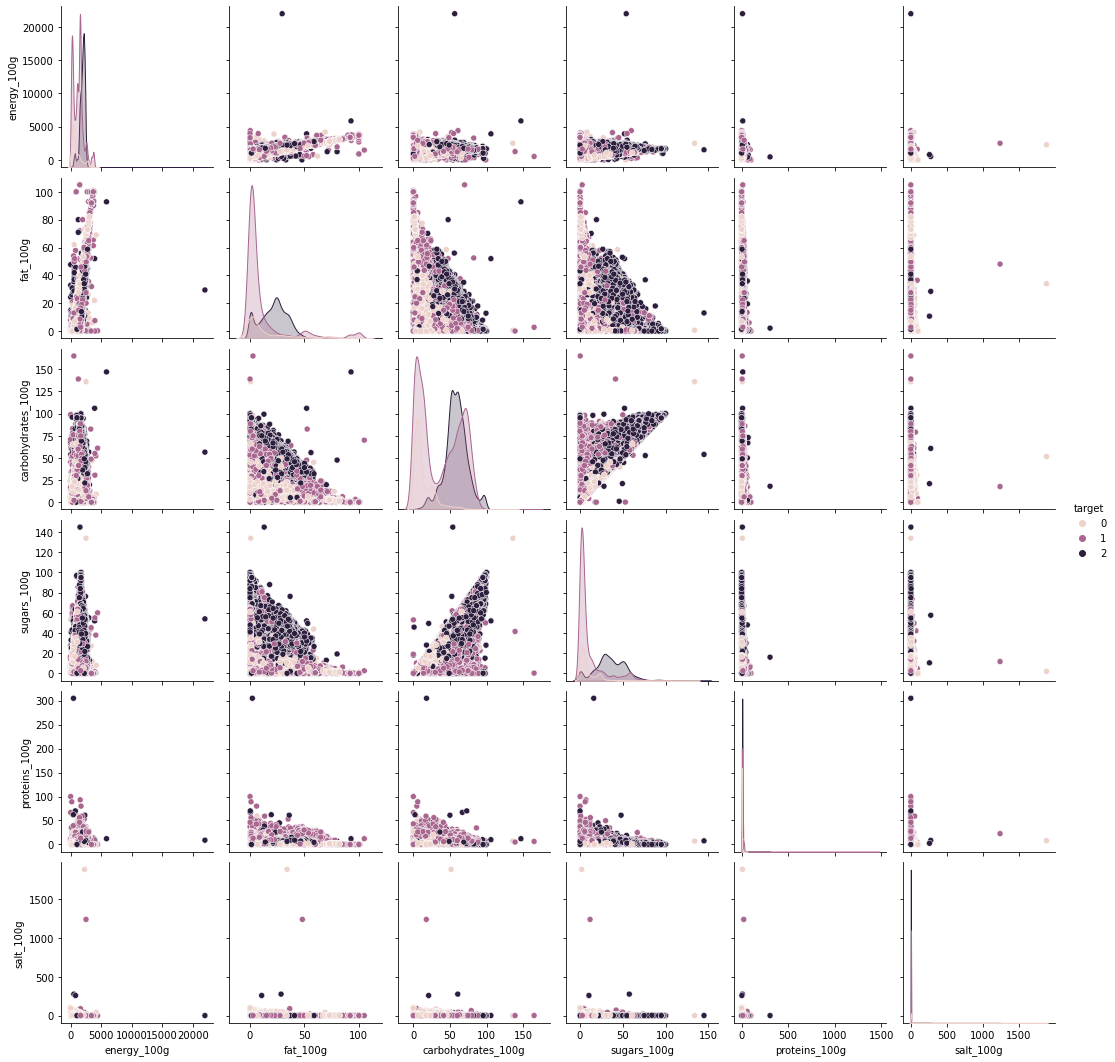

In [39]:
fn.display_pairplot(X_3cat)

En contraignant l'algorithme de partitionnement à 3 partitions puisqu'on connait à l'avance les 3 catégories possibles, on peut supposer que la séparation de ces données en trois groupes bien distincts sera difficile. En effet, on remarque, d'après les graphiques que les données provenant de différentes catégories se chevauchent les unes des autres.

### Suppression des valeurs abberrantes à partir des visualisations précédentes.
On peut déjà détecter visuellement des valeurs aberrantes. Cependant, dans cette première analyse, elles ne seront pas traitées.

#### Création train/test

In [40]:
y = X_3cat['target']
X_3cat.drop('target', axis=1, inplace=True)

E:\Anaconda\envs\openfoodfact\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_3cat, y, test_size=0.2)

In [42]:
y_train_cat.value_counts()

1    18323
2    10252
0     5159
Name: target, dtype: int64

#### Deux méthodes choisies pour gérer les valeurs manquantes:
- Suppression de la ligne dont la valeur est manquante
- Utilisation d'un knn Imputer 

### Mise en place d'un Pipeline pour préparer les données et la prédiction finale

In [43]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [44]:
#RobustScaler()
#knn  Cette valeur est la moyenne des valeurs des k plus proches voisins

In [45]:
num_pipeline = Pipeline([
    ('knn_imputer', KNNImputer()),
    ('std_scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, algorithm="full", random_state=42))
    
])

num_pipeline.fit(X_train_cat)

Pipeline(steps=[('knn_imputer', KNNImputer()), ('std_scaler', StandardScaler()),
                ('kmeans',
                 KMeans(algorithm='full', n_clusters=3, random_state=42))])

#### Inertie très grande

In [46]:
num_pipeline.named_steps['kmeans'].inertia_

123291.46408103657

### Comparaison des clusters avec les catégories réelles

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

In [48]:
prediction = num_pipeline.predict(X_test_cat)

In [49]:
adjusted_mutual_info_score(y_test_cat, prediction)

0.12121024892978274

In [50]:
y_test_cat.value_counts()

1    4627
2    2488
0    1319
Name: target, dtype: int64

In [51]:
cm = contingency_matrix(y_test_cat, prediction)
cm

array([[ 664,  172,  483],
       [1571,  433, 2623],
       [  72,   68, 2348]])

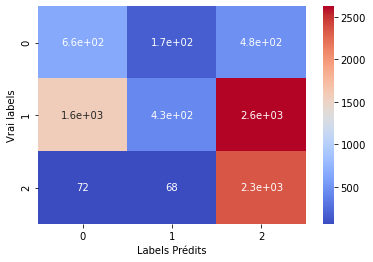

In [52]:
import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap ='coolwarm');
ax.set_ylabel("Vrai labels");
ax.set_xlabel("Labels Prédits");

In [58]:
X_verif_test_cat = pd.concat([X_test_cat, y_test_cat], axis=1)

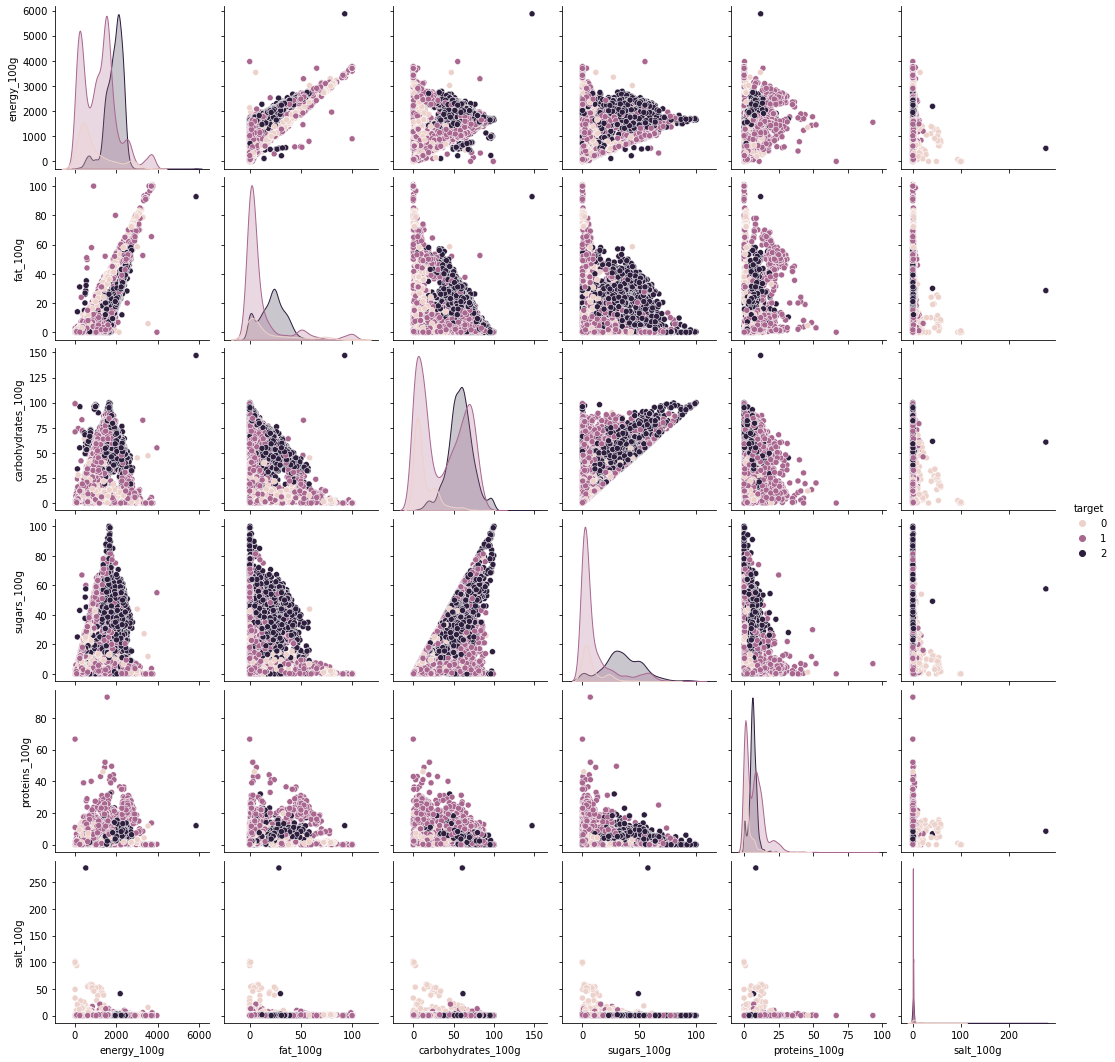

In [61]:
fn.display_pairplot(X_verif_test_cat)

In [55]:
X_pred_col = pd.Series(prediction, index=X_test_cat.index)
X_pred_col = X_pred_col.rename('target') 

In [60]:
X_verif_pred = pd.concat([X_test_cat, X_pred_col], axis=1)

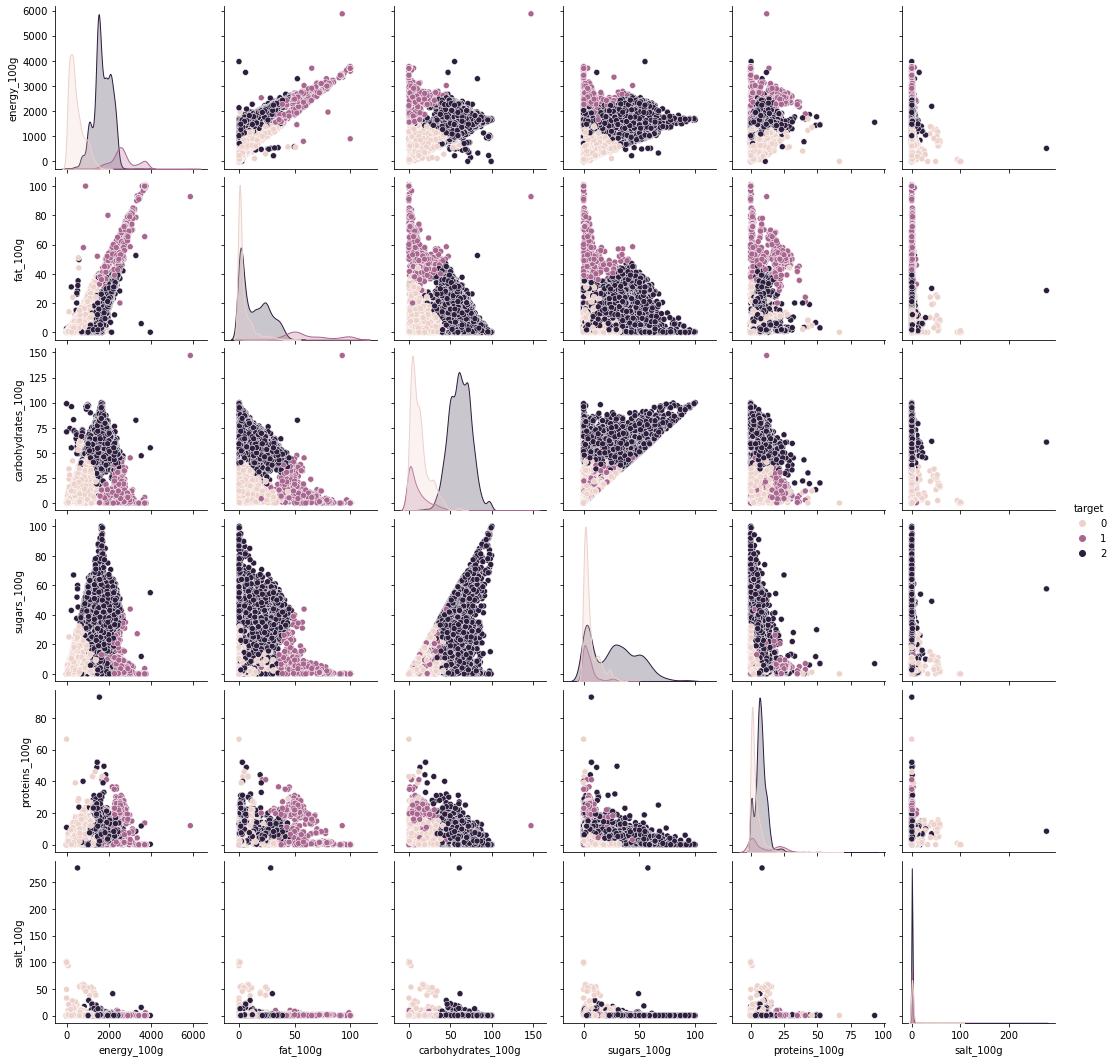

In [57]:
fn.display_pairplot(X_verif_pred)

Sans surprise en contraignant le modèle à 3 clusters, le modèle n'a pas pu séparer correctement les données (inertie grande et mauvais score d'Adjusted Mutual Information).

Cependant, il a tout de même très bien classé les données du cluster 2 avec la bonne catégorie. En observant les plots réels et prédits, nous avons conclu au fait que le cluster mangeait tellement de données de la categorie 1 qu'il pouvait donc obtenir un très bon score dans l'un de ces deux groupes, en l'occurence ici le cluster 2 au détriment de la mauvaise classification des 1.

Nous avons plusieurs hypothèses quant au mauvais résultat de cet première analyse:
- "main_category" est beaucoup trop générale et regroupe des données très/trop différentes au sein d'une même modalité, ce qui perturbe l'algorithme lorsqu'on le contraint à séparer correctement ces catégories.
- les modalités de "main_category" sont mal labellisées.
- Il faut peut-être plus de cluster pour mieux séparer ces données, ce qui revient corroborer les hypothèses ci-dessus.

Pour vérifier cela, nous allons répéter le même scénario en utilisant une nouvelle target "catégories", qui a des modalités plus granulaires que "main_category".

### Approche supervisée avec la target categories

In [74]:
df_with_cat = df.dropna(subset=['categories'])

In [75]:
#missing data
missing_data = fn.display_missing_data(df_with_cat)
missing_data.head(20)

Total  Percent
water-hardness_100g                    103299  1.00000
ingredients_from_palm_oil              103299  1.00000
-melissic-acid_100g                    103299  1.00000
glycemic-index_100g                    103299  1.00000
-elaidic-acid_100g                     103299  1.00000
-mead-acid_100g                        103299  1.00000
-erucic-acid_100g                      103299  1.00000
-nervonic-acid_100g                    103299  1.00000
-caproic-acid_100g                     103299  1.00000
-butyric-acid_100g                     103299  1.00000
-lignoceric-acid_100g                  103299  1.00000
nutrition_grade_uk                     103299  1.00000
ingredients_that_may_be_from_palm_oil  103299  1.00000
-cerotic-acid_100g                     103299  1.00000
chlorophyl_100g                        103299  1.00000
no_nutriments                          103299  1.00000
-myristic-acid_100g                    103298  0.99999
-palmitic-acid_100g                    103298  0.99999
-stearic-acid_100g                     103298  0.99999
-caprylic-acid_100g                    103298  0.99999

In [76]:
nutrition_table_cols = ["energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g",
                        "categories"]

In [85]:
df_with_cat = df_with_cat[nutrition_table_cols].copy()

In [86]:
#missing data
missing_data = fn.display_missing_data(df_with_cat)
missing_data.head(20)

Total   Percent
carbohydrates_100g     30  0.008646
salt_100g              29  0.008357
sugars_100g            29  0.008357
fat_100g               29  0.008357
proteins_100g          24  0.006916
energy_100g            24  0.006916
categories              0  0.000000

In [87]:
df_with_cat['categories'].value_counts()

en:beverages    2368
en:fats          715
Ketchup          387
Name: categories, dtype: int64

In [88]:
df_with_cat = fn.create_dataframe_with_cat(df=df_with_cat, target_col='categories', categories=['en:beverages', 
                                                               'en:fats', 'Ketchup'])


### Encodage de la target

In [91]:

df_with_cat['target'] = fn.encode_target(df_with_cat['categories'])
df_with_cat.drop('categories', axis=1, inplace=True)

In [92]:
df_with_cat.reset_index(drop=True, inplace=True)
df_with_cat

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
0            17.0       0.1                 0.1          0.1            0.1   
1           180.0       0.1                10.7         10.7            0.0   
2           130.0       0.1                 7.6          7.6            0.2   
3           364.0       1.9                14.8          9.4            2.3   
4          3088.0      82.0                 0.4          0.4            0.4   
...           ...       ...                 ...          ...            ...   
3465        121.0       0.0                 0.0          0.0            0.0   
3466         96.0       0.0                 5.7          5.7            0.0   
3467        172.0       0.0                10.2          9.1            0.0   
3468         63.0       1.0                 1.0          1.0           10.0   
3469         33.0      42.0                 5.0          5.0            5.0   

      salt_100g  target  
0         0.001       1  
1         0.000       1  
2         0.030       1  
3         0.050       1  
4         0.030       2  
...         ...     ...  
3465      0.000       1  
3466      0.000       1  
3467      0.070       1  
3468      1.000       1  
3469      4.000       2  

[3470 rows x 7 columns]

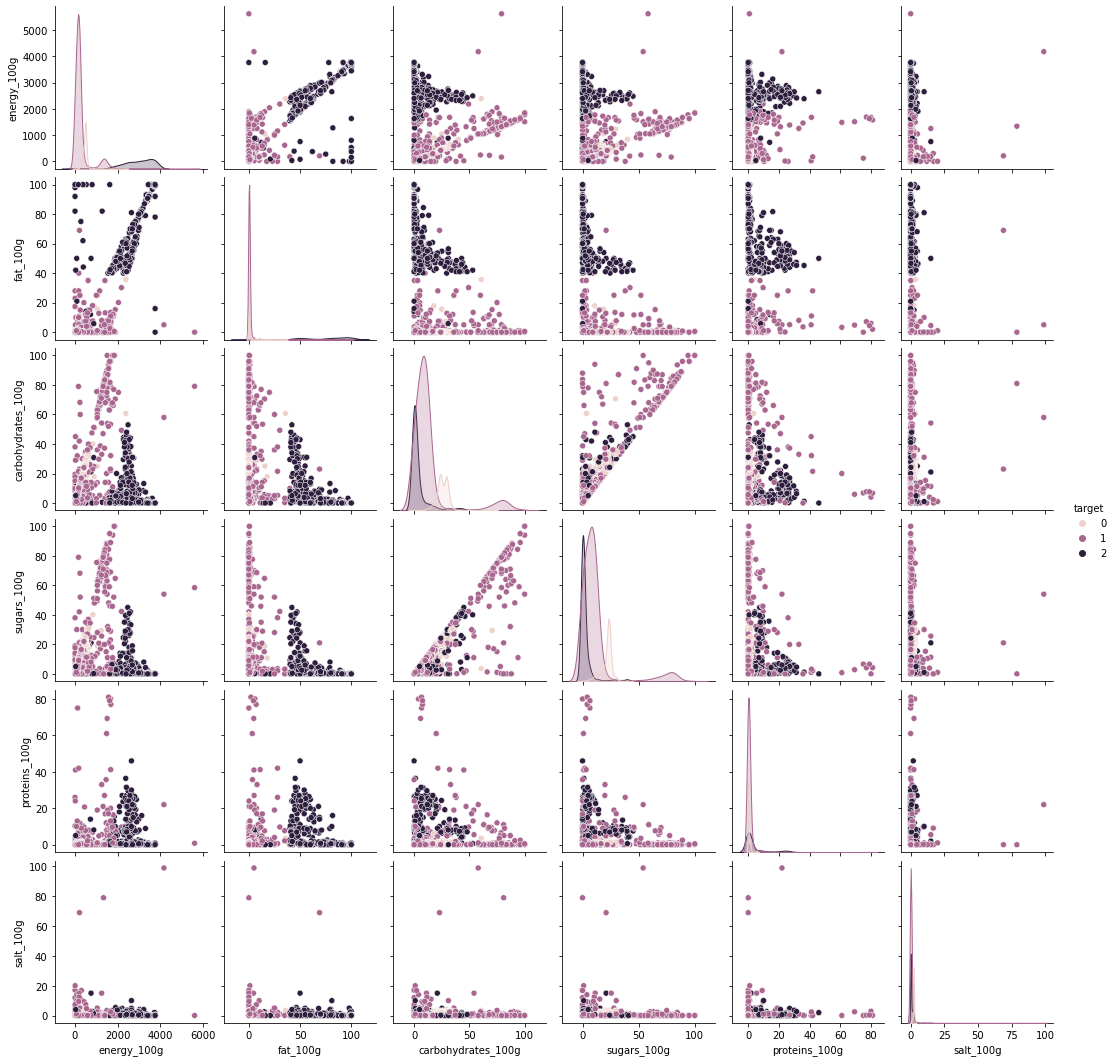

In [94]:
fn.display_pairplot(df_with_cat)

In [95]:
y = df_with_cat['target']
df_with_cat.drop('target', axis=1, inplace=True)

In [262]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(df_with_cat, y, test_size=0.2)

In [263]:
num_pipeline = Pipeline([
    ('knn_imputer', KNNImputer()),
    ('std_scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, n_init=50, algorithm="full", random_state=42))
    
])

num_pipeline.fit(X_train_cat)

Pipeline(steps=[('knn_imputer', KNNImputer()), ('std_scaler', StandardScaler()),
                ('kmeans',
                 KMeans(algorithm='full', n_clusters=3, n_init=50,
                        random_state=42))])

In [264]:
num_pipeline.named_steps['kmeans'].inertia_

7296.863577538611

In [265]:
prediction = num_pipeline.predict(X_test_cat)

In [266]:
adjusted_mutual_info_score(y_test_cat, prediction)

0.6236387885229411

In [267]:
y_test_cat.value_counts()

1    480
2    147
0     67
Name: target, dtype: int64

In [268]:
cm = contingency_matrix(y_test_cat, prediction)
cm

array([[  0,   0,  67],
       [ 39,   2, 439],
       [  2, 143,   2]])

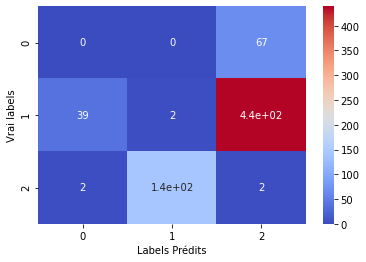

In [269]:
ax = sns.heatmap(cm, annot=True, cmap ='coolwarm');
ax.set_ylabel("Vrai labels");
ax.set_xlabel("Labels Prédits");

In [287]:
X_verif_test = pd.concat([X_test_cat, y_test_cat], axis=1)
X_verif_test

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
1273       2640.0      70.0                0.00         0.00            0.0   
2395        402.0       0.4               20.00          NaN            2.6   
1010       3766.0     100.0                0.00         0.00            0.0   
2469        456.0       5.2               12.30        11.30            3.3   
1699         25.0       0.0                0.10         0.00            0.1   
...           ...       ...                 ...          ...            ...   
2753        134.0       0.5                8.00         8.00            0.5   
1483       1494.0       0.0               86.00        81.00            0.0   
239         494.0       0.0               29.41        23.53            0.0   
1240       1473.0       0.1               85.58        85.37            0.2   
2689        197.0       0.0               11.00        11.00            0.5   

      salt_100g  target  
1273    0.83000       2  
2395        NaN       0  
1010    0.00000       2  
2469    0.10000       1  
1699    0.10000       1  
...         ...     ...  
2753    0.00360       1  
1483    0.00000       1  
239     2.39014       0  
1240    0.02000       1  
2689    0.01000       1  

[694 rows x 7 columns]

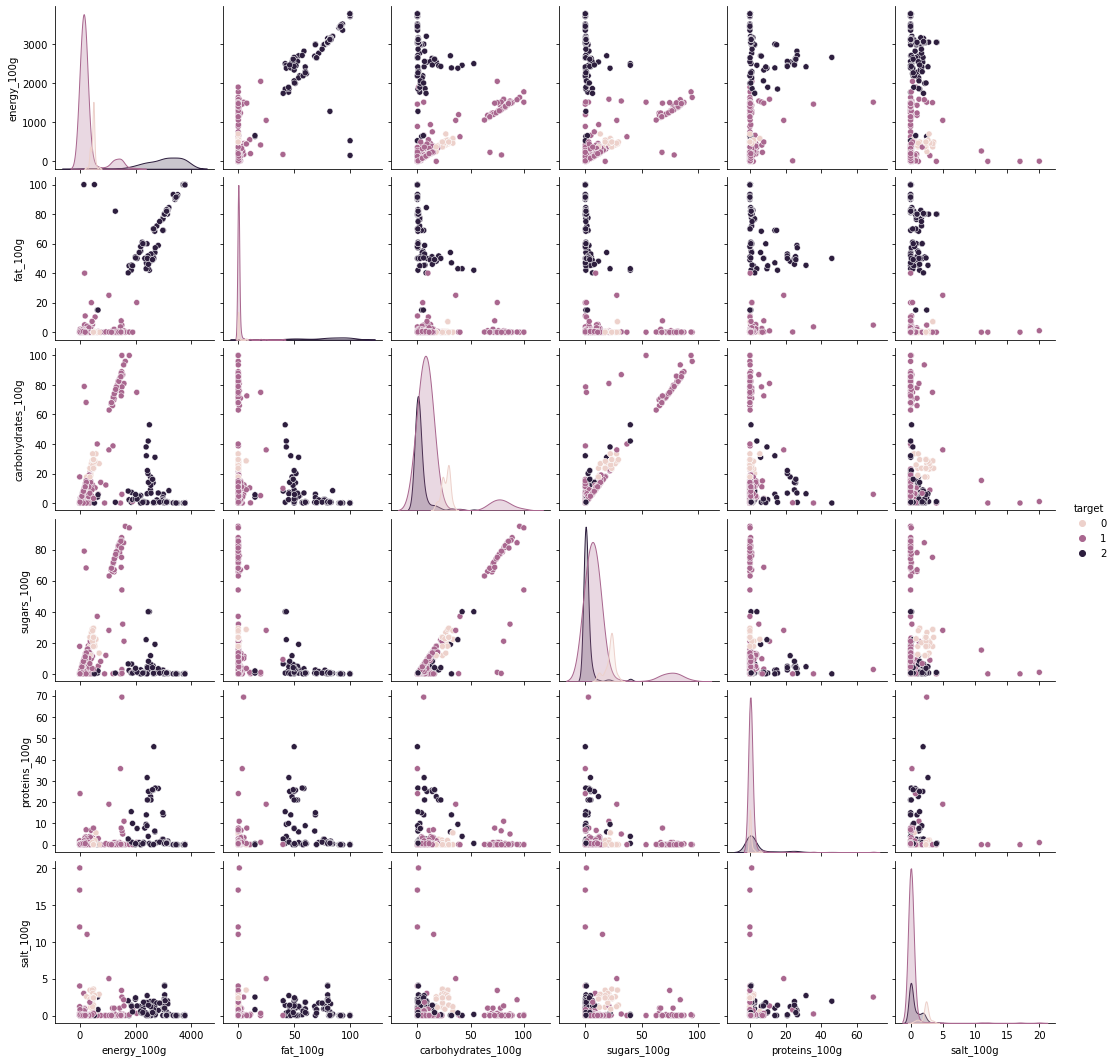

In [290]:
fn.display_pairplot(X_verif_test)

Visuellement les données sont déjà bien plus séparables, on peut envisager qu'il soit capable de mieux séparer les données en 3 clusters.

In [291]:
X_pred_col = pd.Series(prediction, index=X_test_cat.index)
X_pred_col = X_pred_col.rename('target') 

In [292]:
X_verif_pred = pd.concat([X_test_cat, X_pred_col], axis=1)
X_verif_pred

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
1273       2640.0      70.0                0.00         0.00            0.0   
2395        402.0       0.4               20.00          NaN            2.6   
1010       3766.0     100.0                0.00         0.00            0.0   
2469        456.0       5.2               12.30        11.30            3.3   
1699         25.0       0.0                0.10         0.00            0.1   
...           ...       ...                 ...          ...            ...   
2753        134.0       0.5                8.00         8.00            0.5   
1483       1494.0       0.0               86.00        81.00            0.0   
239         494.0       0.0               29.41        23.53            0.0   
1240       1473.0       0.1               85.58        85.37            0.2   
2689        197.0       0.0               11.00        11.00            0.5   

      salt_100g  target  
1273    0.83000       1  
2395        NaN       2  
1010    0.00000       1  
2469    0.10000       2  
1699    0.10000       2  
...         ...     ...  
2753    0.00360       2  
1483    0.00000       0  
239     2.39014       2  
1240    0.02000       0  
2689    0.01000       2  

[694 rows x 7 columns]

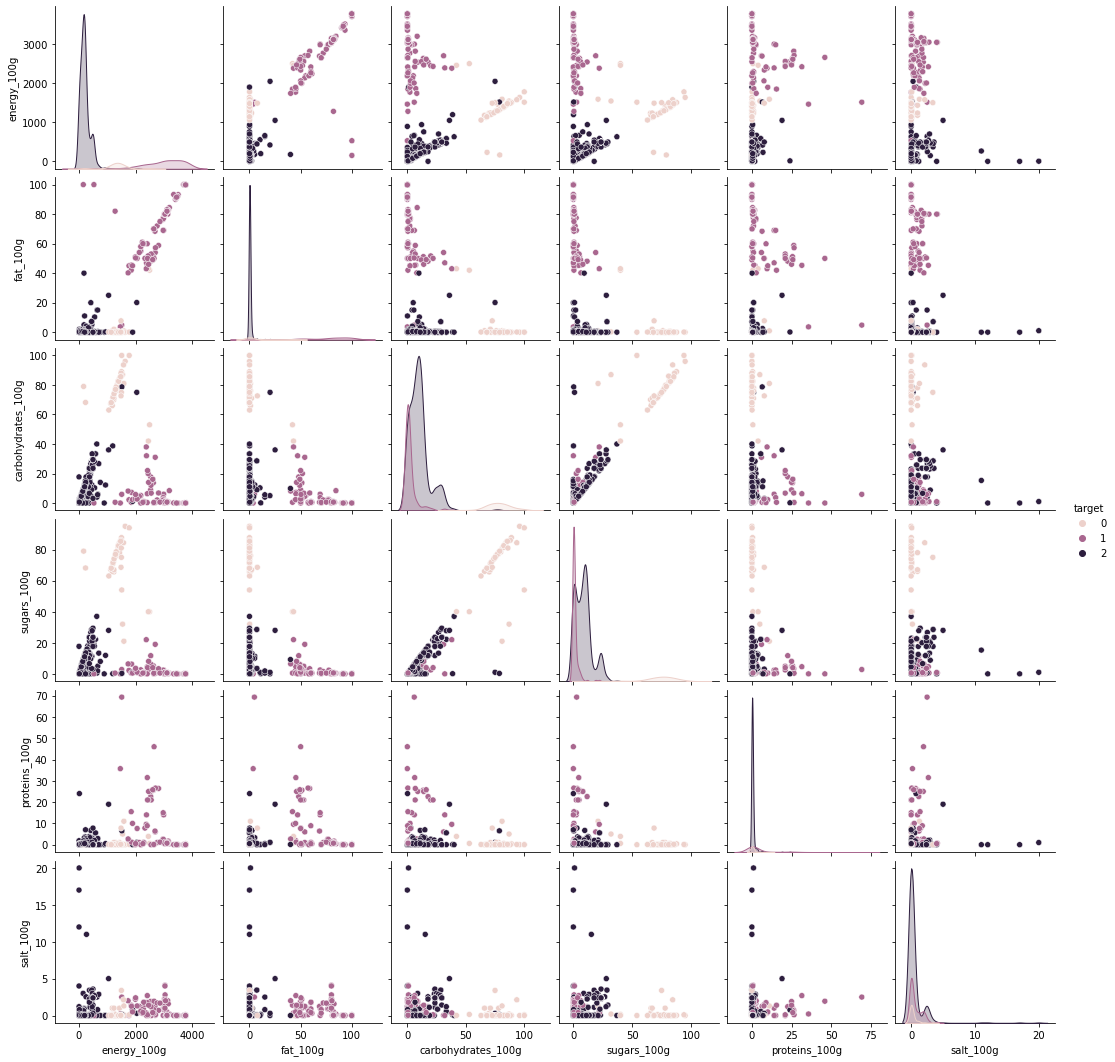

In [293]:
fn.display_pairplot(X_verif_pred)

Bien que les classes 1 et 2 soient interverties, nous obtenons un bien meilleur score en utilisant "categories" comme target.
Il serait intéressant d'aller vérifier les données qu'il a catégorisé comme appartenant au cluster 0 sur le plot (x:carbohydrates_100g, y:energy_100g) alors qu'en réalité elles appartiennent au cluster 1 (voir plot plus haut). Peut-être que là aussi, ces données ont été mal labellisées.

### Analyse de la target main_category vs categories

Nous obtenons de meilleurs résultats en utilisant la colonne categories comme target, ceci peut etre dû en parti à deux choses:
- Le paradoxe de Simpson:

Le fait d'avoir combiné plusieurs catégories en une seule categorie plus générale, nous obtenons des résultats complétement différents. Des catégories ont peut être été regroupées alors que les données sont bien différentes ce qui perturbera le partitionnement.


- Une mauvaise labellisation de la colonne main_category:

L'exemple qui saute aux yeux sont les modalités "en:plant-based-foods-and-beverages" et "en:beverages", comment l'algorithme peut-il les séparer correctement les données.

- Les données rangées dans des catégories plus granulaires sont bien mieux regroupées que celles dans main_category.


Les hypothèses précédentes:
- "main_category" est beaucoup trop générale et regroupe des données très/trop différentes au sein d'une même modalité, ce qui perturbe l'algorithme lorsqu'on le contraint à séparer correctement ces catégories.
- les modalités de "main_category" sont mal labellisées.
- Il faut peut-être plus de cluster pour mieux séparer ces données, ce qui revient corroborer les hypothèses ci-dessus.


# Approche non supervisée

### Utilisation d'un sous ensemble qui contiendra 10 modalités de main_category

In [461]:
nutrition_table_cols = ["energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g",
                        "main_category",
                        "product_name"
                       ]

In [462]:
df_unsupervised = df[nutrition_table_cols].copy()

In [463]:
df_unsupervised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   energy_100g         295367 non-null  float64
 1   fat_100g            279497 non-null  float64
 2   carbohydrates_100g  279220 non-null  float64
 3   sugars_100g         279186 non-null  float64
 4   proteins_100g       294161 non-null  float64
 5   salt_100g           289739 non-null  float64
 6   main_category       103249 non-null  object 
 7   product_name        338515 non-null  object 
dtypes: float64(6), object(2)
memory usage: 21.7+ MB


In [464]:
df_unsupervised['main_category'].value_counts().nlargest(10)

en:plant-based-foods-and-beverages    22950
en:beverages                          14205
en:sugary-snacks                      12740
en:dairies                             8086
en:groceries                           6478
en:meats                               5397
en:fresh-foods                         3562
en:meals                               3005
en:spreads                             2445
en:salty-snacks                        2384
Name: main_category, dtype: int64

In [465]:
cat_to_keep = ['en:plant-based-foods-and-beverages', 'en:beverages', 'en:sugary-snacks', 'en:dairies', 'en:groceries',
              'en:meats', 'en:fresh-foods', 'en:meals', 'en:spreads', 'en:salty-snacks']

In [466]:
df_unsupervised = fn.create_dataframe_with_cat(df=df_unsupervised, target_col='main_category', categories=cat_to_keep)

In [467]:
df_unsupervised.reset_index(drop=True, inplace=True)
df_unsupervised

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
0           1210.0      12.0                23.0          0.0          22.00   
1           1520.0      14.4                54.1         28.1           4.79   
2              NaN       NaN                 NaN          NaN            NaN   
3           1090.0      10.7                38.7         24.7           3.33   
4              NaN       NaN                 NaN          NaN            NaN   
...            ...       ...                 ...          ...            ...   
81247          NaN       NaN                 NaN          NaN            NaN   
81248         21.0       0.2                 0.5          0.5           0.50   
81249          NaN       NaN                 NaN          NaN            NaN   
81250          NaN       NaN                 NaN          NaN            NaN   
81251          NaN       NaN                 NaN          NaN            NaN   

       salt_100g                       main_category  \
0         2.1600  en:plant-based-foods-and-beverages   
1         0.9220                    en:sugary-snacks   
2            NaN  en:plant-based-foods-and-beverages   
3         0.6470                    en:sugary-snacks   
4            NaN  en:plant-based-foods-and-beverages   
...          ...                                 ...   
81247        NaN                        en:beverages   
81248     0.0254                        en:beverages   
81249        NaN                            en:meats   
81250        NaN  en:plant-based-foods-and-beverages   
81251        NaN                     en:salty-snacks   

                         product_name  
0                        Salade Cesar  
1      Danoises à la cannelle roulées  
2                               Flute  
3        Chaussons tressés aux pommes  
4                   lentilles vertes   
...                               ...  
81247       Roussette du Bugey (2011)  
81248              Thé vert Earl grey  
81249                  Rillette d'oie  
81250                             NaN  
81251                         乐吧泡菜味薯片  

[81252 rows x 8 columns]

In [505]:
X_train_unsuperv, X_test_unsuperv = train_test_split(df_unsupervised, test_size=0.3, random_state=0)

In [506]:
df_word_train = X_train_unsuperv[['main_category', 'product_name']].copy()
df_word_test = X_test_unsuperv[['main_category', 'product_name']].copy()

X_train_unsuperv.drop(['main_category', 'product_name'], axis=1, inplace=True)
X_test_unsuperv.drop(['main_category', 'product_name'], axis=1, inplace=True)

E:\Anaconda\envs\openfoodfact\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [507]:
X_train_unsuperv.reset_index(drop=True, inplace=True)

In [508]:
len(X_train_unsuperv)

56876

In [ ]:
num_pipeline = Pipeline([
    ('knn_imputer', KNNImputer()),
    ('attr', o.OutliersDetection()),
    ('std_scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('kmeans', KMeans(n_clusters=20, algorithm="full", random_state=42)) 
])

num_pipeline.fit(X_train_unsuperv)

In [514]:
num_pipeline.named_steps['kmeans'].inertia_

25930.178089436078

### PCA et recherche de k (hors pipeline juste pour trouver le k)

In [516]:
test = num_pipeline.named_steps['knn_imputer'].transform(X_train_unsuperv)
#test = num_pipeline.named_steps['attr'].transform(test)
test = num_pipeline.named_steps['std_scaler'].transform(test)

In [517]:
housing_extra_attribs = pd.DataFrame(
    test,
    columns=list(X_train_unsuperv.columns),
    index = [i for i in range(test.shape[0])])
housing_extra_attribs.head()

energy_100g  fat_100g  carbohydrates_100g  sugars_100g  proteins_100g  \
0    -0.002926  0.004016            0.008854     0.006646       0.000656   
1    -1.444008 -0.856674           -1.071466    -0.751074      -0.796277   
2    -0.002926  0.004016            0.008854     0.006646       0.000656   
3    -0.260290  0.278379           -1.071466    -0.690400       0.650886   
4    -1.398849 -0.825662           -1.038669    -0.757141      -0.640429   

   salt_100g  
0   0.000715  
1  -0.130621  
2   0.000715  
3   0.177365  
4  -0.119621

In [518]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(housing_extra_attribs)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

In [519]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(housing_extra_attribs)

In [520]:
pca.components_

array([[ 0.63805406,  0.42172387,  0.47578087,  0.4261011 ,  0.07808608,
        -0.03176424],
       [ 0.25796559,  0.55207946, -0.45148789, -0.49883666,  0.4131192 ,
         0.07290554],
       [-0.00420901, -0.06758902,  0.08235218,  0.04396113,  0.06106864,
         0.99144852],
       [-0.07486243, -0.37545808,  0.2580272 ,  0.02654048,  0.88067198,
        -0.10276805],
       [-0.19846577,  0.1537837 , -0.57579825,  0.75287205,  0.19610664,
         0.01200659]])

In [521]:
pca.explained_variance_

array([2.12156928, 1.54793842, 0.99698863, 0.90723164, 0.40059784])

In [522]:
pca.explained_variance_ratio_

array([0.35358866, 0.2579852 , 0.16616185, 0.15120261, 0.06676513])

In [523]:
kmeans = KMeans(n_clusters=20, algorithm="full", random_state=42)
kmeans.fit(X_reduced)

KMeans(algorithm='full', n_clusters=20, random_state=42)

In [524]:
kmeans.inertia_

25930.178089436078

In [525]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in [5,10, 15, 20, 25, 30, 35, 45, 50, 60]]

inertias = [model.inertia_ for model in kmeans_per_k]

In [526]:
inertias

[135513.09194830968,
 52962.728242813,
 34616.215342976335,
 25930.178089436078,
 20503.968719933684,
 17317.406118694915,
 15260.809474390117,
 12339.360248917297,
 11342.750689492284,
 9863.674396807484]

### Méthode du coude pour rechercher le bon nombre de cluster

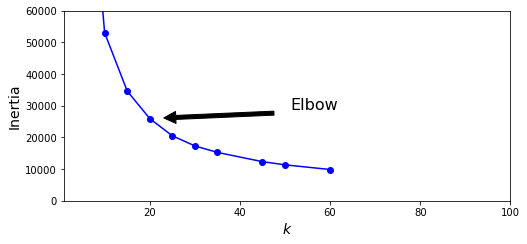

In [527]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot([5,10, 15, 20, 25, 30, 35, 45, 50, 60], inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(20, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 100, 0, 60000])
plt.show()

In [528]:
train_prediction = kmeans.predict(X_reduced)

In [535]:
s = pd.Series(train_prediction)
s = s.rename('cluster') 
s

0         2
1         8
2         2
3        14
4         8
         ..
56871    14
56872     8
56873     2
56874     9
56875     2
Name: cluster, Length: 56876, dtype: int32

In [536]:
s.value_counts()

2     12732
8      9078
0      4886
14     4111
1      3720
18     3427
9      3170
11     3081
7      2018
15     1932
19     1838
17     1785
5      1385
4      1331
12     1228
16      962
13      122
10       68
6         1
3         1
Name: cluster, dtype: int64

In [537]:
df_word_train.reset_index(drop=True, inplace=True)
df_word_test.reset_index(drop=True, inplace=True)

In [538]:
gg = pd.concat([df_word_train, s], axis=1)
gg

main_category  \
0                        en:sugary-snacks   
1      en:plant-based-foods-and-beverages   
2                        en:sugary-snacks   
3                          en:fresh-foods   
4      en:plant-based-foods-and-beverages   
...                                   ...   
56871                            en:meals   
56872                            en:meals   
56873                            en:meats   
56874                          en:dairies   
56875                            en:meats   

                                            product_name  cluster  
0                         Chocolat Noir Corsé Pâtissier         2  
1      Mon Marché Plaisir Tomates cerises la barquett...        8  
2                                    Garfield fish candy        2  
3                                Knacks Volaille (x 10)        14  
4                              Haricots Verts Extra-Fins        8  
...                                                  ...      ...  
56871                                 Dolce Pizza Regina       14  
56872                                  Gratin dauphinois        8  
56873                                      Saucisson sec        2  
56874                       Parmiggiano reggiano copeaux        9  
56875                     Fein geräuchertes Putenfleisch        2  

[56876 rows x 3 columns]

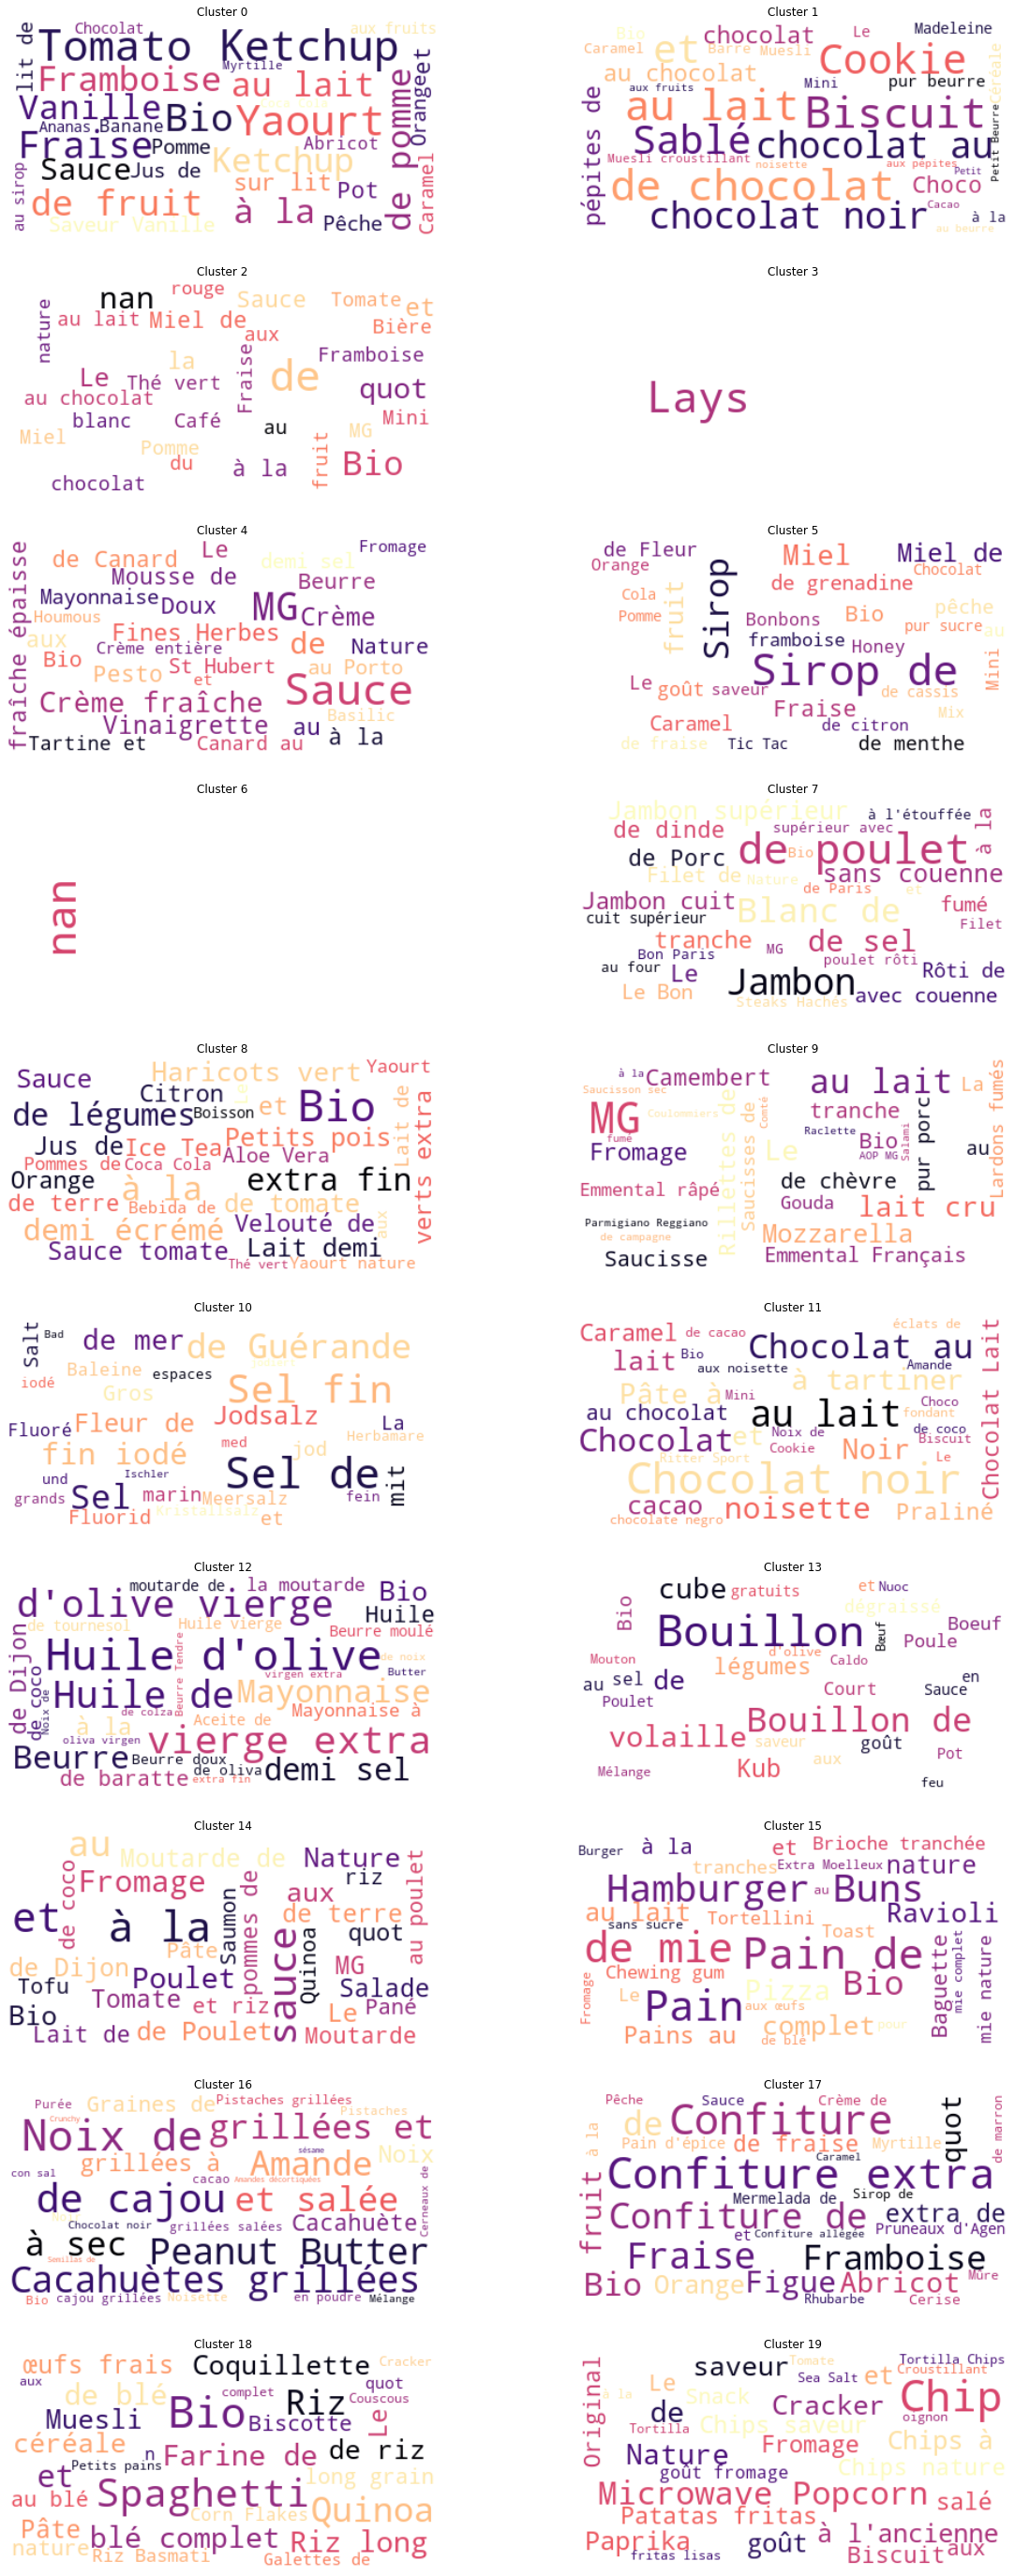

In [552]:
fn.tt(gg)

Malgré une inertie relativement grande, on observe tout de même qu'il a su détecter des structures cachées dans les données, afin de regrouper correctement des classes de produits. On peut voir en effet dans les nuages de mots des différents cluster des familles de produit assez proche. Par exemple le cluster 7, il reconnait clairement les produits faisant référence à la charcuterie, le jambon, le blanc de poulet, de dinde. De même pour le cluster 9, il regroupe la famille des fromages hormis pour le saucisson qui s'invite à la fête ! 
Le cluster 11 a lui aussi bien regroupé le chocolat, les pâtes à tartiner, les biscuits chocos.

On voit cellule 536 que les deux derniers clusters sont uniquement constitués de une donnée. On pourrait donc réentrainer le modèle en utilisant cette fois-çi un k=18.
Même si le cluster 10 possède tres peu de données, on peut observer quelque chose d'intéressant. Il a été capable de trouver une structure pouvant ranger tout ce qui se rapportait au sel dans ce groupe.

Concernant les axes d'améliorations: 
- Entraîner un gridSearch pour régler au mieux les hyperparamètres pouvant être améliorés (autre que k !!) 
- Pousser l'analyse de la PCA (observer danns les composantes ce qui explique le mieux les données)
- Tester des méthodes de plongement comme le t-SNE pour observer les combinaisons de variables non linéaires.
- Utiliser d'autres mesures de performance que l'inertie afin de comparer les résultats.
- Extraire de l'information dans les variables objects comme la liste des ingrédients où product_name (puisqu'on peut naturellement ranger des produits dans une catégorie par leur nom ex: Soupe de légumes et Soupe à la poule): Utiliser une mesure de similarité comme la distance cosine pour mesurer la ressemblance des noms de produits, où en utilisant une méthode plus poussée comme par exemple l'Embedding.  

### Test du dbscan

In [147]:
from sklearn.cluster import DBSCAN
pipeline_dbscan = Pipeline([
    ('knn_imputer', KNNImputer()),
    ('attr', o.OutliersDetection()),
    ('std_scaler', StandardScaler()),
    ('dbscan', DBSCAN(eps=0.05, min_samples=5))
])

pipeline_dbscan.fit(X_train_unsuperv)

Pipeline(steps=[('knn_imputer', KNNImputer()), ('std_scaler', StandardScaler()),
                ('dbscan', DBSCAN(eps=0.05))])

In [148]:
pipeline_dbscan.named_steps['dbscan'].labels_

array([ 0, -1,  1, ..., 60, -1, -1], dtype=int64)

In [149]:
len(pipeline_dbscan.named_steps['dbscan'].core_sample_indices_)

14922

In [150]:
pipeline_dbscan.named_steps['dbscan'].core_sample_indices_

array([    0,     2,     5, ..., 36184, 36185, 36189], dtype=int64)

In [151]:
pipeline_dbscan.named_steps['dbscan'].components_

array([[ 3.20093154e-02,  1.24968849e-02,  1.53256514e-02, ...,
         4.69168118e-03,  8.45982924e-04,  3.18622313e-02],
       [-5.87929525e-01, -1.57944603e-01, -2.18729205e-01, ...,
        -7.95328127e-02, -8.33787708e-02, -2.15598956e-01],
       [-5.87929525e-01, -1.57944603e-01, -2.18729205e-01, ...,
         2.28049270e-02,  1.89527836e-02, -7.95669141e-01],
       ...,
       [-5.87929525e-01, -1.57944603e-01, -2.18729205e-01, ...,
        -1.66009506e-02,  6.17595812e-03,  1.64291180e-02],
       [-5.87929525e-01, -1.57944603e-01, -2.18729205e-01, ...,
        -1.66009506e-02,  6.17595812e-03,  1.64291180e-02],
       [-5.87929525e-01, -1.57944603e-01, -2.18729205e-01, ...,
        -6.49131356e-02, -6.87599773e-02, -1.08570423e+00]])

### Pas de methode predict pour le dbscan, entrainement d'un classifieur en sortie

In [152]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(test.named_steps['dbscan'].components_, 
        test.named_steps['dbscan'].labels_[test.named_steps['dbscan'].core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [157]:
X_test_trans = num_pipeline.transform(X_test_unsuperv)

In [160]:
pred = knn.predict(X_test_trans)

In [161]:
pred_prob = knn.predict_proba(X_test_trans)

In [162]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test_cat, pred)
print(cf_matrix)

[[397 154   0 ...   8   0   1]
 [133   1   0 ...   2   0   1]
 [427  12   0 ...   6   4   2]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
